## RPP filter for the single trapezoidal filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Lets define the exponential decay function with random noise   

In [2]:
baseline=0.
amp=5
noise_amp=10.
tau=1500
L=3000
#L=length


In [3]:
x=np.arange(-L/2,L/2,1)
def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

In [4]:
E = expo(amp, x, tau)

In [5]:
N=[0.]*L
N=np.array(N)
for i in range (0,L):
    N[i]=random.uniform(-1,1)
N=N*noise_amp
#now baseline offset
baseline_c=[baseline]*L
baseline_c=np.array(baseline_c)
A = baseline_c+expo(amp, x, tau)
A=np.array(A)
#Hence the total signal
T=A+N

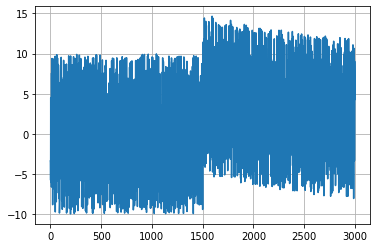

In [6]:
plt.plot(T)
plt.grid()

Lets define most of the numpy array

In [7]:
#Initialization
v_n=T
L0=300
L1=100
L2=300
L3=267

v_n=np.array(v_n)
R0_L=[0]*L
R1_L=[0]*L
R2_L=[0]*L
R0_1_L=[0]*L
R1_1_L=[0]*L
R2_1_L=[0]*L

R0_L1=[0]*L
R1_L1=[0]*L
R2_L1=[0]*L
R0_1_L1=[0]*L
R1_1_L1=[0]*L
R2_1_L1=[0]*L

R0_L2=[0]*L
R1_L2=[0]*L
R2_L2=[0]*L
R0_1_L2=[0]*L
R1_1_L2=[0]*L
R2_1_L2=[0]*L

R0_L3=[0]*L
R1_L3=[0]*L
R2_L3=[0]*L
R0_1_L3=[0]*L
R1_1_L3=[0]*L
R2_1_L3=[0]*L

R0_0_L=[0]*L
R0_1_L=[0]*L
R0_2_L=[0]*L

R0_0_L1=[0]*L
R0_1_L1=[0]*L
R0_2_L1=[0]*L

R0_0_L2=[0]*L
R0_1_L2=[0]*L
R0_2_L2=[0]*L

R0_0_L3=[0]*L
R0_1_L3=[0]*L
R0_2_L3=[0]*L

D=[0]*L
D1=[0]*L
D2=[0]*L

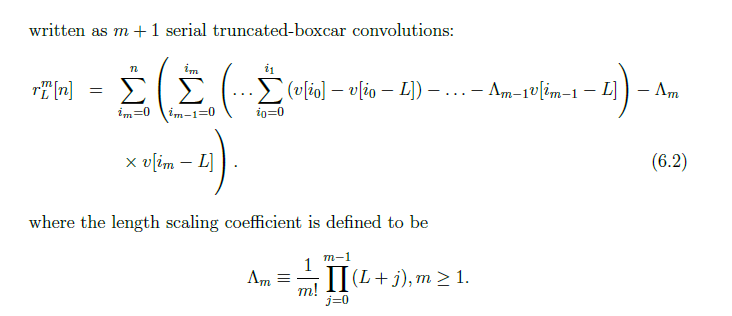

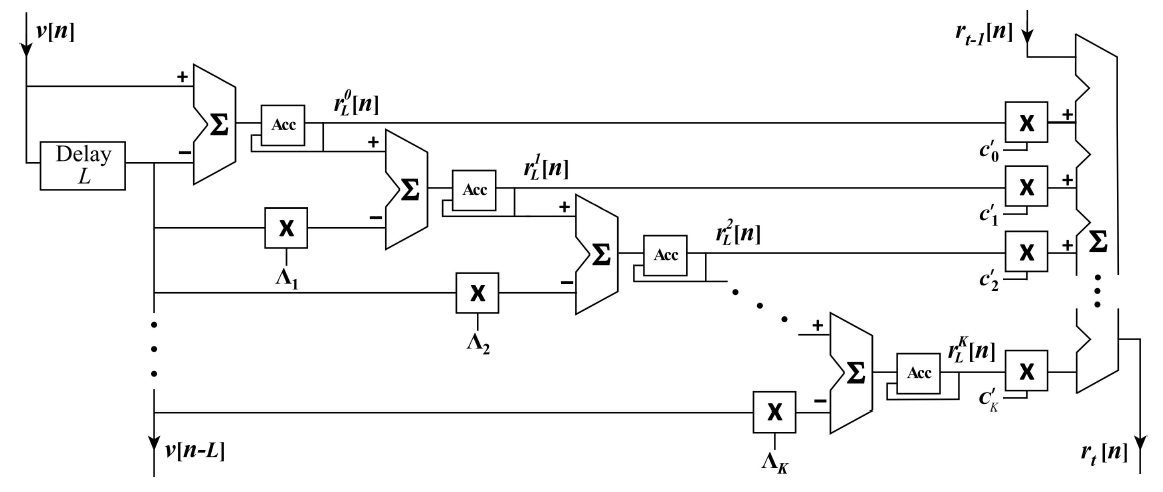

In [8]:
for i in range (0, L):
    if i>L0:
        #1st one
        #R_0_L[i]
        R0_L[i]=v_n[i] - v_n[i-L0]
        R0_1_L[i]=R0_1_L[i-1]+R0_L[i]  #r0_L0
        
        R1_L[i]=R0_1_L[i] - L0*v_n[i-L0] 
        R1_1_L[i]=R1_1_L[i-1]+R1_L[i]#r1_L0
        
        R2_L[i]=R1_1_L[i] - (0.5*L0*(L0+1))*v_n[i-L0] 
        R2_1_L[i]=R2_1_L[i-1]+R2_L[i]#r2_L0 
        

for i in range (0, L):
    if i>L1:
        R0_L1[i]=v_n[i] - v_n[i-L1] 
        R0_1_L1[i]=R0_1_L1[i-1]+R0_L1[i] #r0_L1
        
        R1_L1[i]=R0_1_L1[i] - L1*v_n[i-L1] 
        R1_1_L1[i]=R1_1_L1[i-1]+R1_L1[i] #r1_L1
        
        R2_L1[i]=R1_1_L1[i] - (0.5*L1*(L1+1))*v_n[i-L1] 
        R2_1_L1[i]=R2_1_L1[i-1]+R2_L1[i] #r2_L1 
for i in range (0, L):
    if i>L2:
        R0_L2[i]=v_n[i] - v_n[i-L2] 
        R0_1_L2[i]=R0_1_L2[i-1]+R0_L2[i] #r0_L2
        
        R1_L2[i]=R0_1_L2[i] - L2*v_n[i-L2] 
        R1_1_L2[i]=R1_1_L2[i-1]+R1_L2[i] #r1_L2
        
        R2_L2[i]=R1_1_L2[i] - (0.5*L2*(L2+1))*v_n[i-L2]  
        R2_1_L2[i]=R2_1_L2[i-1]+R2_L2[i] #r2_L2
        
for i in range (0, L):
    if i>L3:
        R0_L3[i]=v_n[i] - v_n[i-L3] 
        R0_1_L3[i]=R0_1_L3[i-1]+R0_L3[i] #r0_L3
        
        R1_L3[i]=R0_1_L3[i] - L3*v_n[i-L3]
        R1_1_L3[i]=R1_1_L3[i-1]+R1_L3[i] #r1_L1
        
        R2_L3[i]=R1_1_L3[i] - (0.5*L3*(L3+1))*v_n[i-L3] 
        R2_1_L3[i]=R2_1_L3[i-1]+R2_L3[i] #r2_L1 
     
    #cprime coefficients from "CheckingRPPWithSimpleWaveform" program
    #first piece [3.33333333e-03 2.22222222e-06 3.60199702e-23]
    #2nd piece [ 6.66666667e-04  1.68432084e-20 -4.95338315e-23]
    #3rd piece [-1.77777778e-03 -2.22222222e-06 -7.50871080e-24]       

for i in range (L0+L1,L):
    D[i]=3.33333333e-03*R0_1_L[i]+2.22222222e-06*R1_1_L[i]+3.60199702e-23*R2_1_L[i]
    D1[i]=6.66666667e-04*R0_1_L1[i-L0]+-2.14387710e-20*R1_1_L1[i-L0]-4.94728649e-22*R2_1_L1[i-L0]
    D2[i]=-2.66666667e-03*R0_1_L2[i-L0-L1]-2.22222222e-06*R1_1_L2[i-L0-L1]-2.96298297e-23*R2_1_L2[i-L0-L1]

In [9]:
r_f=[0]*L
r_f1=[0]*L

In [10]:
for i in range (0,L):
    if i>(L0+L1+L2):
        r_f1[i]=D[i]+D1[i]+D2[i]

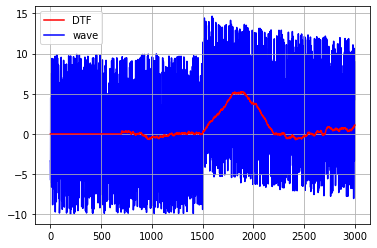

In [11]:
plt.plot(r_f1, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.grid()
plt.show()
